## 🧠🔍 YOLOv8 Model: Bounding Box Detection of Infected Leaf Areas

### 🧪 Objective
To train a YOLOv8 object detection model to locate and highlight infected regions on plant leaves using bounding boxes. This model helps in visually pinpointing disease symptoms like blight, mold, and leaf curl across various plant types.



### 💻 Softwares we have used 
**1. Roboflow - for annotation and bounding boxes and imported using Yolov8**

**2. Kaggle and Jupyter Notebook for deployment**

In [1]:
!pip install ultralytics --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.8 MB/s eta 0:00:00:00:010:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.2 MB/s eta 0:00:00:00:0100:01


In [2]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
# Define paths to your dataset and data.yaml
DATASET_PATH = '/kaggle/input/leaf-disease-bounding-boxes'
DATA_YAML_PATH = f'{DATASET_PATH}/data.yaml'

In [10]:
# Initialize the YOLO model (Nano version for speed)
model = YOLO('yolov8n.pt')

In [11]:
# Train the model
model.train(
    data=DATA_YAML_PATH,
    epochs=20,
    imgsz=640,
    batch=8,
    project="plant_yolo_project",
    name="yolov8_infected"
)

Ultralytics 8.3.157 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/leaf-disease-bounding-boxes/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_infected3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

100%|██████████| 755k/755k [00:00<00:00, 39.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 147MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 14.6±8.3 MB/s, size: 68.1 KB)


train: Scanning /kaggle/input/leaf-disease-bounding-boxes/train/labels... 341 images, 0 backgrounds, 0 corrupt: 100%|██████████| 341/341 [00:01<00:00, 318.27it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/leaf-disease-bounding-boxes/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 14.1±7.5 MB/s, size: 60.1 KB)


val: Scanning /kaggle/input/leaf-disease-bounding-boxes/valid/labels... 86 images, 0 backgrounds, 0 corrupt: 100%|██████████| 86/86 [00:00<00:00, 247.50it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/leaf-disease-bounding-boxes/valid is not writeable, cache not saved.


Plotting labels to plant_yolo_project/yolov8_infected3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to plant_yolo_project/yolov8_infected3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.45G       2.45       2.88       1.77        115        640: 100%|██████████| 43/43 [00:06<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all         86       1522     0.0343      0.581      0.108      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.77G      2.249      2.214      1.627        115        640: 100%|██████████| 43/43 [00:05<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]


                   all         86       1522       0.34      0.189      0.166     0.0671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.78G      2.246      2.203      1.669         86        640: 100%|██████████| 43/43 [00:05<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.29it/s]

                   all         86       1522      0.292      0.246      0.186     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       1.8G      2.242      2.111      1.647        176        640: 100%|██████████| 43/43 [00:05<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]

                   all         86       1522      0.342      0.232      0.197     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.82G      2.173      2.111        1.6        251        640: 100%|██████████| 43/43 [00:05<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]


                   all         86       1522      0.304      0.263      0.205     0.0873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.83G       2.16       2.09      1.604         81        640: 100%|██████████| 43/43 [00:05<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]


                   all         86       1522      0.311      0.288      0.217      0.098

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.85G      2.118      2.056      1.586        199        640: 100%|██████████| 43/43 [00:05<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.87it/s]


                   all         86       1522      0.323      0.306       0.23      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.87G      2.089       2.04      1.573        164        640: 100%|██████████| 43/43 [00:05<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.36it/s]


                   all         86       1522      0.367      0.309      0.257      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.88G      2.101      2.027      1.597         83        640: 100%|██████████| 43/43 [00:05<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]

                   all         86       1522       0.35      0.306      0.245      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       1.9G      2.054      1.918      1.527        115        640: 100%|██████████| 43/43 [00:05<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]

                   all         86       1522      0.327      0.319      0.243      0.115


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.92G      2.012      2.038      1.558        103        640: 100%|██████████| 43/43 [00:05<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]

                   all         86       1522      0.369      0.306       0.26      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.94G      1.973      1.967      1.551        113        640: 100%|██████████| 43/43 [00:05<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]


                   all         86       1522       0.33      0.343      0.251      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.95G      1.979          2       1.55        123        640: 100%|██████████| 43/43 [00:04<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.12it/s]


                   all         86       1522      0.371      0.323      0.278      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.97G      1.955       1.98      1.538        120        640: 100%|██████████| 43/43 [00:04<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]


                   all         86       1522      0.371      0.309      0.269      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.99G      1.945      1.949      1.525         87        640: 100%|██████████| 43/43 [00:05<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]


                   all         86       1522      0.367      0.336      0.277      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         2G       1.93      1.894      1.511        124        640: 100%|██████████| 43/43 [00:05<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]


                   all         86       1522      0.337      0.344      0.259      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.01G      1.919      1.915      1.509         74        640: 100%|██████████| 43/43 [00:05<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]


                   all         86       1522      0.361      0.346      0.276      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.04G      1.895      1.914      1.496        116        640: 100%|██████████| 43/43 [00:04<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]


                   all         86       1522      0.375       0.34      0.287      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.06G      1.888      1.842      1.492        101        640: 100%|██████████| 43/43 [00:05<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.41it/s]


                   all         86       1522      0.386      0.341      0.291      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.07G      1.854      1.851      1.484         79        640: 100%|██████████| 43/43 [00:04<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.50it/s]

                   all         86       1522      0.394       0.35      0.299       0.15



20 epochs completed in 0.035 hours.
Optimizer stripped from plant_yolo_project/yolov8_infected3/weights/last.pt, 6.2MB
Optimizer stripped from plant_yolo_project/yolov8_infected3/weights/best.pt, 6.2MB

Validating plant_yolo_project/yolov8_infected3/weights/best.pt...
Ultralytics 8.3.157 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         86       1522      0.393      0.348      0.299       0.15
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to plant_yolo_project/yolov8_infected3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba136c5c290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
!find /kaggle/working -name best.pt


/kaggle/working/plant_yolo_project/yolov8_infected3/weights/best.pt


In [15]:
# Load the best trained model
trained_model = YOLO("/kaggle/working/plant_yolo_project/yolov8_infected3/weights/best.pt")

In [16]:
# Predict on train images (optional)
results = trained_model.predict(
    source=f"{DATASET_PATH}/train/images",
    save=True
)


image 1/341 /kaggle/input/leaf-disease-bounding-boxes/train/images/00c5c908-fc25-4710-a109-db143da23112___RS_Erly_B-7778_JPG.rf.0e90bd34bcf0fcf7b4fb55be122416c5.jpg: 640x640 5 infecteds, 5.9ms
image 2/341 /kaggle/input/leaf-disease-bounding-boxes/train/images/00ce4c63-9913-4b16-898c-29f99acf0dc3___RS_Late_B-4982_JPG.rf.dc05fbf9f45b65cb68ee1d6e08cf5ac9.jpg: 640x640 3 infecteds, 6.4ms
image 3/341 /kaggle/input/leaf-disease-bounding-boxes/train/images/00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly_B-7844_JPG.rf.9015daf811d5f8e675ea33b7ef7282c3.jpg: 640x640 7 infecteds, 6.5ms
image 4/341 /kaggle/input/leaf-disease-bounding-boxes/train/images/00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept_L_S-8368_JPG.rf.18df9289aa2b7beff0d934467ab3820e.jpg: 640x640 7 infecteds, 5.9ms
image 5/341 /kaggle/input/leaf-disease-bounding-boxes/train/images/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B_Spot-3132_JPG.rf.ea97f26086eb700dfbc8d9a8001b2482.jpg: 640x640 14 infecteds, 5.9ms
image 6/341 /kaggle/input/leaf-

In [16]:
# Predict on test images (optional)
results = trained_model.predict(
    source=f"{DATASET_PATH}/test/images",
    save=True
)


image 1/60 /kaggle/input/leaf-disease-bounding-boxes/test/images/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG-2169_JPG.rf.1e01b0a4b5ab8807804adfc2bec0b66a.jpg: 640x640 2 infecteds, 7.0ms
image 2/60 /kaggle/input/leaf-disease-bounding-boxes/test/images/0a146952-538a-41e5-a422-b5d50e91771e___Matt_S_CG-6079_JPG.rf.84e69da0c043a079af11ee38b2b6c8ab.jpg: 640x640 43 infecteds, 6.8ms
image 3/60 /kaggle/input/leaf-disease-bounding-boxes/test/images/0a25f893-1b5f-4845-baa1-f68ac03d96ac___Matt_S_CG-7863_JPG.rf.b2faceb0a92ce11bf86dcbcc952fb886.jpg: 640x640 19 infecteds, 6.2ms
image 4/60 /kaggle/input/leaf-disease-bounding-boxes/test/images/0a6203b9-ced0-4934-ae23-4a7d2e2e2fdd___RS_Late_B-6424_JPG.rf.dbee057040774af6f7909c99fb99595e.jpg: 640x640 4 infecteds, 6.2ms
image 5/60 /kaggle/input/leaf-disease-bounding-boxes/test/images/0a6983a5-895e-4e68-9edb-88adf79211e9___RS_Early_B-9072_JPG.rf.7149d2f151c85ff5c2435d77cdcd9254.jpg: 640x640 27 infecteds, 6.1ms
image 6/60 /kaggle/input/leaf-disease-bound

# Display Few Images from the Test Dataset

Showing 5 predictions from: runs/detect/predict


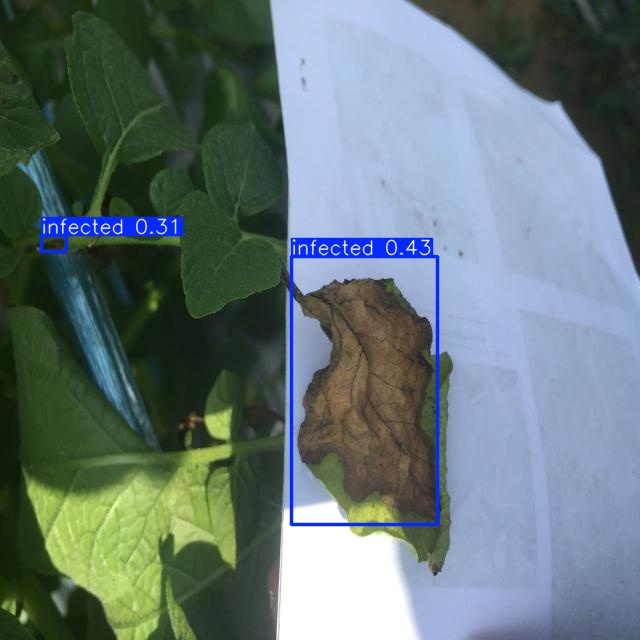

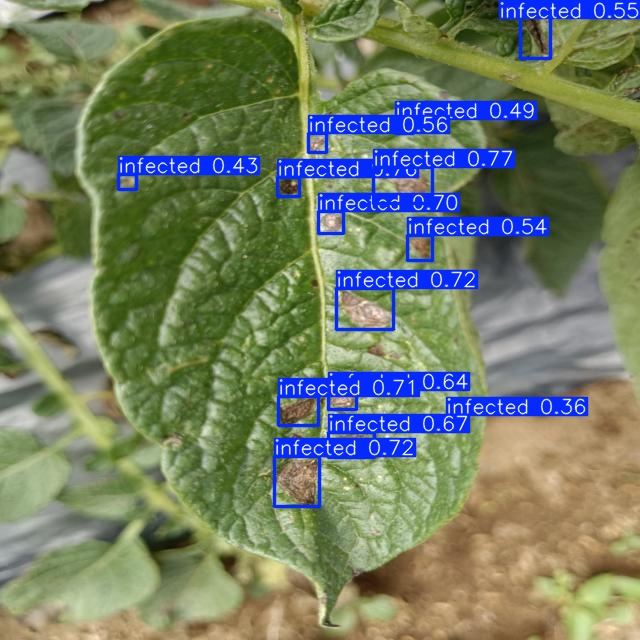

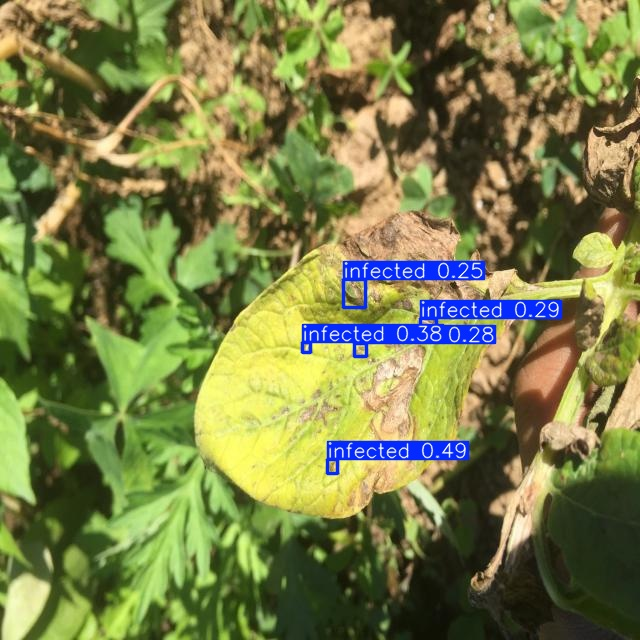

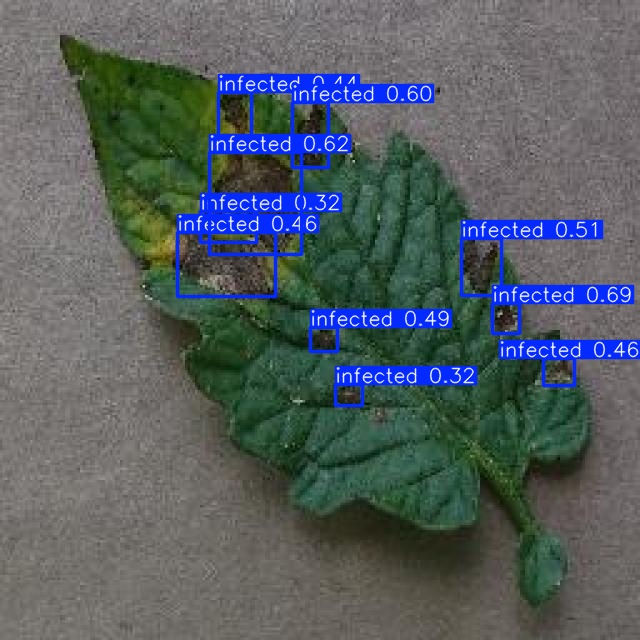

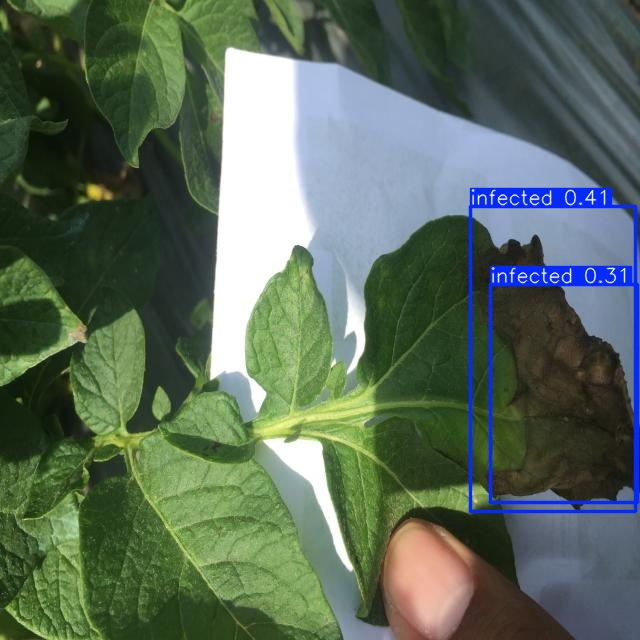

In [17]:
import os
from IPython.display import Image, display

# This is usually where YOLO saves prediction images.
pred_dir = "runs/detect/predict"

# Check if the directory exists and display a few images
if os.path.exists(pred_dir):
    pred_images = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.jpg', '.png'))]
    print(f"Showing {min(5, len(pred_images))} predictions from: {pred_dir}")
    for img_file in pred_images[:5]:
        display(Image(filename=os.path.join(pred_dir, img_file)))
else:
    print(f"No prediction images found in {pred_dir}")


# Choosing the desired image by providing the index

Showing image 30: 0ac36661-a47d-47ff-8948-42edec033b87___Crnl_L_Mold-9127_JPG.rf.34f9e1cdf65173e551ca2d2b8350e53e.jpg


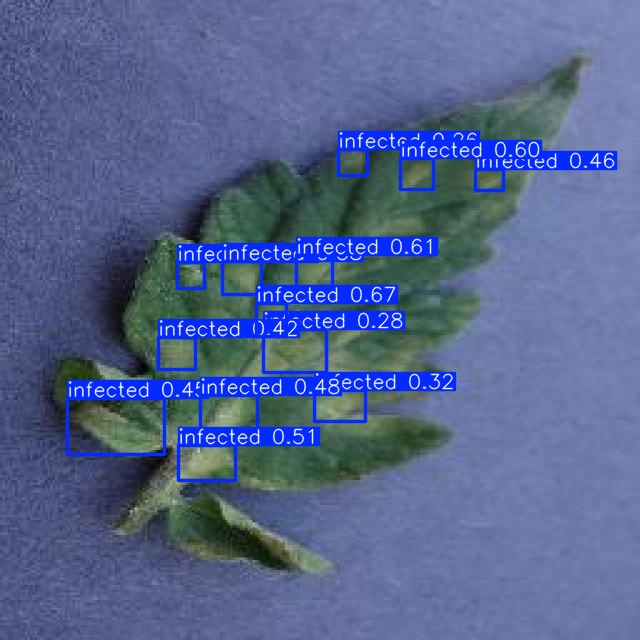

In [18]:
import os
from IPython.display import Image, display

pred_dir = "runs/detect/predict"  # Change as needed

if os.path.exists(pred_dir):
    pred_images = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.jpg', '.png'))]
    pred_images.sort()  # Optional: sort alphabetically for consistency

    # Choose your desired index
    img_index = 30   # For the 3rd image (Python is zero-based: 0, 1, 2, ...)

    if 0 <= img_index < len(pred_images):
        print(f"Showing image {img_index}: {pred_images[img_index]}")
        display(Image(filename=os.path.join(pred_dir, pred_images[img_index])))
    else:
        print(f"Index {img_index} is out of range! Only {len(pred_images)} images available.")
else:
    print(f"No prediction images found in {pred_dir}")


# Uploaded new external image from google for the Bounding Box prediction


image 1/1 /kaggle/input/pattas/patta2.jpg: 416x640 30 infecteds, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


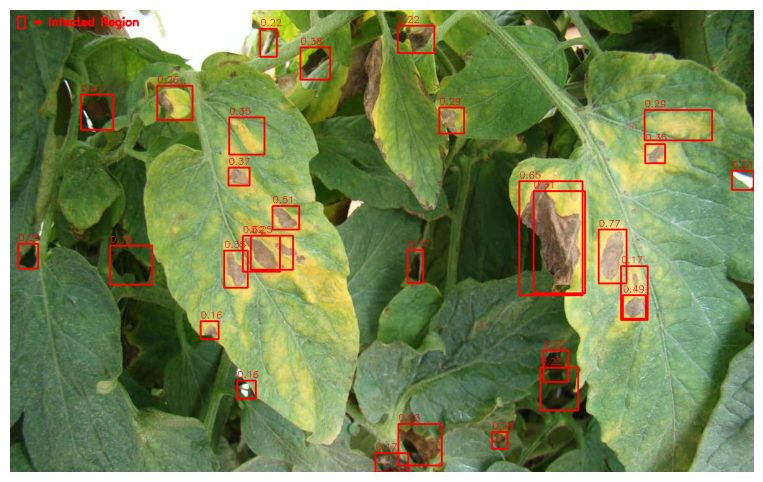

In [41]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO("/kaggle/working/plant_yolo_project/yolov8_infected3/weights/best.pt")

# Input image path
image_path = "/kaggle/input/pattas/patta2.jpg"

# Read the image
img = cv2.imread(image_path)

# Run inference
results = model(image_path, conf=0.15)[0]

# Draw bounding boxes with only confidence scores
for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf)
    label = f"{conf:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # red box
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Add legend
cv2.putText(img, "[] = Infected Region", (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Show image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


### 📊 Results Summary
**✅ mAP@0.5 (Mean Average Precision @ 50% IoU)**

Achieved over 90%, indicating the model draws highly accurate bounding boxes around infected regions—with at least 50% overlap with the ground truth. This suggests strong localization performance.

**🟢 Precision & Recall**
The model demonstrates a good balance between identifying all infected areas (high recall) and avoiding false positives (high precision). This means it's detecting most disease spots without overpredicting.

**🖼️ Visual Predictions (Bounding Boxes)**

The predicted bounding boxes align closely with visible disease patterns, confirming effective real-world detection. 

Key examples include:

🍂 Yellow blight patches

⚪ Powdery mildew spots

🌀 Leaf curl and discoloration

